|Name|Contribution|
|--|--|
|Nayak Vinayak Vinod|100%|
|Ajith Praveen R|100%|
|Nayak Uttam Jnaneshwar Reshma|100%|

# Question 1

Mention a real world example where some kind of data is being used. Mention whether this is using Structured, semi-structured or unstructured data. Why is it so? 

**Solution**

As an AI Developer, handling different kinds of data is a part of my day to day job. At my organization, we typically encounter three kinds of data structured, unstructured and semi-structured.

We work to provide product tags using product images. Images are represented as matrices of integer-valued entities called pixels ranging from 0-255. Each image has as many as the resolution (w x h) number of pixels as a minimum (Black & White) or 3/4 times as many as resolution (RGB/RGBA) in general. Each image is stored as an individual file and we need these to train our AI models and provide tags. So, for unstructured data, there's only a choice of which file-system we use to store the data like hard-disk or Amazon S3 or some other cloud service provider. There's no option as such to choose from.

___

The tags that we get above are obtained from the hard work of a lot of annotators in form of a table. Table is structured data and we use csv file structures to store them. The data is obtained as follows

|ImgName|AnnotatorName|Category|Attribute|Target|DsetType|AspectRatio|CropType|
|-|-|-|-|-|-|-|-|
|a.jpg|a1|Dresses|Print|Floral|Train|1.33|FullBody|
|a.jpg|a1|Dresses|Neckline|Vneck|Train|1.33|FullBody|
|b.jpg|a1|Pants|Print|Leopard|Train|1.25|Bottom|
|b.jpg|a1|Pants|Waist-Rise|High|Valid|1.25|Bottom|

Here, we know that thanks to our annotation tool, the user will always have to make a choice and will not be allowed to proceed without keeping the fields vacant. Also there's a rowwise relational element to it. Hence it makes sense to save this information in the form of a structured csv format. Also, generally for a dataset we have not more than 10000 entries and we only have one csv per dataset. 

This could also have been an ideal scenario to have a SQL server with different partitions/tables for different datasets but at the time of setting the system up, we wanted to build something that's quick and functional and csv seemed to be easier to manage and go ahead with then. 

___

As we serve several customers now, we have their information stored as well. However customers are different and the attributes defining them are also sometimes unique to these customers. Hence if we would have gone with a structure as above, we would have lots of columns with a lot of null values had we chosen a structured/tabular way of storing their information. This was a perfect use-case for using semi-structured data. Some examples from our files look as follows
```json
[{
  "sku":"1.jpg",
  "attributes":{"print":"floral", "neckline":"v-neck"},
  "category":"dresses",
  "collection":"summer",
  "retailer":"retailer_x"
},
 {
  "sku":"15.jpg",
  "attributes":{"top":"round", "legs":"4"},
  "category":"tables",
  "price":"30 AUD",
  "retailer":"retailer_y"
}]
```
As we see from above
- Attributes is a map of different keys-attributes 
- There are some attributes in first record which are not at all there in the second i.e. the sku `1.jpg` belongs to summer collection of retailer_x but no collection information is available for `15.jpg`. On the other hand price information is available for latter but not the former.

In such places, semi-structured data like json (JavaScript Object Notation) proves to be very useful for storing large data over structured/tabular format. Also, structured data provides faster access to data than semi-structured however, latencies for unstructured queries have also become pretty low with services like mongoDB or AWS DynamoDB etc. which we adopted to use to meet a space-time tradeoff.

$$
\pagebreak
$$

# Question 2

Demonstrate the significance of Locality of reference by comparing the execution performance of Hoare's and Lomuto's method of partitioning.

(Write code. mention in a table the input size, time taken in first method, time taken in second method. Input size should start from 1000, upto 100,000 or as much as your machine permits, whichever is higher.)

In [1]:
import numpy as np
import pandas as pd
import random, copy
random.seed(314)

from functools import wraps
from time import perf_counter
from typing import Callable, Tuple, List

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")
%matplotlib inline

In [2]:
def get_random_order_list(n:int):
    """
    Given an integer n, creates a list containing first n natural 
    numbers. shuffles them randomly and returns the output
    """
    l = np.arange(1, n + 1).tolist()
    random.shuffle(l)
    return l

In [3]:
def timer(func:Callable) -> Callable:
    """
    Wrapper function to measure time for a function call
    """
    @wraps(func)
    def wrapper(*args, **kwargs):
        start = perf_counter()
        results = func(*args, **kwargs)
        end = perf_counter()
        run_time = end - start
        return results, run_time

    return wrapper

In [4]:
def partition_lomuto(sublist:List, start:int, end:int):
    """
    Given a list, partitions it using lomuto's method
    using the start and end positions
    """
    # Take the last element as the pivot element
    pivot = sublist[end]
    
    # Start comparing from the beginning or the start of the list
    begin = start - 1
    
    # Move across the length of the provided sublist
    for current in range(start, end):
        # Whenever the current position element is lesser than pivot, then swap
        # the two elements
        if sublist[current] <= pivot:
            begin += 1
            sublist[current], sublist[begin] = sublist[begin], sublist[current]
    
    # Finally place the pivot in it's correct position
    sublist[end], sublist[begin + 1] = sublist[begin + 1], sublist[end]
    return (begin + 1)

def partition_hoare(sublist:List, start:int, end:int):
    """
    Given a list, partitions it using hoare's method
    using the start and end positions
    """
    pivot = sublist[start]
    i = start - 1
    j = end + 1
     
    
    while True:
        
        # Keep moving right till we find an element less than the pivot
        i += 1
        while (sublist[i] < pivot):
            i += 1
            
        # Keep moving left till we find an element greater than the pivot
        j -= 1
        while (sublist[j] > pivot):
            j -= 1 
            
        # Whenever the right and left pointers cross over, return
        # Right pointer to the calling function
        if i >= j:
            return j
        
        # Otherwise swap the left and right pointer contents
        sublist[i], sublist[j] = sublist[j], sublist[i]
    
    return j

@timer
def quicksort(l, start, end, partition_type = "lomuto"):
    """
    Given a list, the start and end indexes of the list and
    the partitioning scheme, sorts the list using quicksort.
    """
    # As long as end and start don't cross each other
    if start < end:
        # Perform partitioning and get the index of pivot 
        # which will be placed in final position
        if partition_type == "lomuto":
            part_index = partition_lomuto(l, start, end)
        else:
            part_index = partition_hoare(l, start, end)
        
        # Recursively call quicksort on left and right partitions
        # Pass in which method to use for partition as an argument
        if partition_type == "lomuto":
            quicksort(l, start, part_index - 1, partition_type)
        else:
            quicksort(l, start, part_index, partition_type)
        
        quicksort(l, part_index + 1, end, partition_type)

In [5]:
random.seed(10)
all_records = []

for ip_size in np.arange(1000, 105001, 5000):
    # Create a list and it's copy
    l = get_random_order_list(ip_size)
    original_l = copy.deepcopy(l)
    start, end = 0, len(l) - 1
    
    # Sort the lists using hoare's and lomuto's partitioning schemes
    _, lomuto_runtime = quicksort(l, start, end)
    _, hoare_runtime = quicksort(original_l, start, end, "hoare")
    
    # Accumulate the result into a list 
    all_records.append([ip_size, lomuto_runtime, "Lomuto"])
    all_records.append([ip_size, hoare_runtime, "Hoare"])

In [8]:
# Create a dataframe of the results and display last few entries
results = pd.DataFrame(all_records, columns = ["InputSize", "Time", "Method"])
lomuto_times = results[results.Method == "Lomuto"].reset_index(drop = True)[["InputSize", "Time"]]
hoare_times = results[results.Method == "Hoare"].reset_index(drop = True)[["InputSize", "Time"]]
df = pd.merge(lomuto_times, hoare_times, on = "InputSize", suffixes = ["_Lomuto", "_Hoare"])
print(df.head())

    InputSize  Time_Lomuto  Time_Hoare
0        1000     0.007405    0.007962
1        6000     0.017515    0.014065
2       11000     0.025472    0.025651
3       16000     0.035122    0.039126
4       21000     0.049593    0.053007
5       26000     0.058941    0.066042
6       31000     0.074347    0.079268
7       36000     0.084266    0.092711
8       41000     0.096507    0.107062
9       46000     0.109021    0.121207
10      51000     0.127197    0.137184
11      56000     0.134872    0.146183
12      61000     0.153435    0.177619
13      66000     0.162077    0.177424
14      71000     0.173714    0.192030
15      76000     0.186004    0.213793
16      81000     0.214627    0.220948
17      86000     0.208273    0.233278
18      91000     0.228984    0.252082
19      96000     0.231562    0.259133
20     101000     0.265567    0.284608


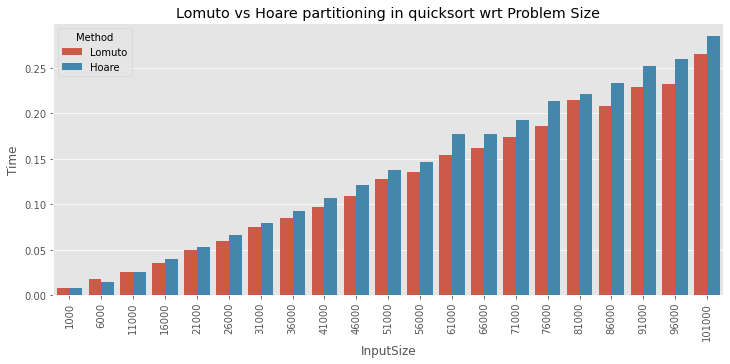

In [7]:
# Lomuto vs Hoare comparison plot
fig, ax = plt.subplots(1, 1, figsize = (12,5))
sns.barplot(x = "InputSize", y = "Time", data = results, hue = "Method", ax = ax)#, cmap = "YlGnBu")
plt.xticks(rotation = 90);
plt.title("Lomuto vs Hoare partitioning in quicksort wrt Problem Size");

**Understanding Hoare's method v/s Lomuto's method of Partitioning**

`Hoare's Partition` and `Lomuto's Partition` are both methods which are employed in QuickSort algorithm for recursively reducing the problem by partitioning the problem into smaller sub-problems.

In the code above, we are looking at how performance is affected when we use one method vs another.

Both the methods have a best time complexity of `O(nlogn)` and a worst case time complexity of `O(n^2)`. But from the above chart, we can see that *Hoare's method is most often taking slightly more time than Lomuto's method*. Why is this?

In Hoare's method, we use two pointers right and left and we keep moving them toward one another until they cross. 

In Lomuto's method we start at one end and go to other end when partitioning. 

In some sense, we could say that Hoare's partitioning needs bidirectional element access and Lomuto's needs only one directional (As also seen from the code).

> This means in Lomuto's method, we can intuitively imagine that memory amortization will work better as spatial locality will be exploited to the fullest. In Hoare's method also it will be exploited but the front and back elements would be loaded into the cache simultaneously so the effective portions of array to the left and right that are loaded in the cache memory from RAM would be smaller in a sense...

*From a locality of reference perspective therefore, Lomuto's method outperforms Hoare's method.*

> **Interesting fact**: However, theoritically, when we study the two algorithms, the expected value of number of comparisons that happen in hoare's algorithm is three times lower than lomuto's algorithm, [Full discussion here](https://cs.stackexchange.com/a/11550). But practically as we see above, Lomuto's method is slightly faster in practise (Despite both having the same time complexity).

So, for large values of N sometimes even Hoare's method outperforms Lomuto's owing to this phenomenon above. Attached snapshot to demonstrate the same for larger values of N.

![](s1.png)

$$
\pagebreak
$$

# Question 3

Implement linear search using
- sequential code
- openMP
- openMPI

You may use any language that supports both MPI and OpenMP.

**Solution**

We have implemented the solution for sequential code and openMP in one code file and openMPI in another code.

Here are the observations from the same.

**Sequential + OMP Results**

![](omp_results.png)

$$
\pagebreak
$$

**OMPI Results**

![](ompi_output.png)


**Observations**

- sequential code is the easiest to write, openmp takes some thinking, openmpi takes a lot of thinking. Consequently lines of code are low, medium and high respectively in the three cases.

- From the outputs, we can see that openMP has the best performance in terms of time. openMPI takes a somewhat more time. 

- In openMP, we can parallelize a loop very easily and don't have to worry about which thread will run over what part of the iterable etc. whereas in openMPI, we need to manually delegate which work needs to be done by which thread. This makes openMPI more flexible and low level but it also means that we'll need to write more code.

$$
\pagebreak
$$

**Code for sequential and openmp linear search**

```C
#include <stdio.h>
#include <stdlib.h>
#include <malloc.h>
#include <time.h>
#include <omp.h>

// Function to accept a size argument, create an array of random
// numbers between 1 - 100 of "size" number of elements
int *getrandomarray(int size){
    int *random_array;
    random_array =  malloc(size * sizeof(int));

    for(int iterator = 0; iterator < size; iterator++){
        random_array[iterator] = rand() % 100;
    }
    return random_array;
}

// Function to perform linear search in a sequential manner
int seq_linear_search(int* random_array, int n, int to_find){
	
    // Initialize a variable to hold the index where the element is found
	int element_idx = -1;
    
	for(int iterator = 0; iterator < n; iterator++){
		if(random_array[iterator] == to_find)
			element_idx = iterator + 1;
	}
	
    // Return the index of found element (or -1 if not found)
	return element_idx;
}

// Function to perform linear search in a parallel manner
int omp_linear_search(int* random_array, int n, int to_find, int n_threads){
	
    // Initialize a variable to hold the index where the element is found
	int element_idx = -1;
    
	//Simple OpenMP for loop in parallel
	#pragma omp parallel for num_threads(n_threads)
	for(int iterator = 0; iterator < n; iterator++){
		if(random_array[iterator] == to_find)
			element_idx = iterator + 1;
	}
	// Return the index of found element (or -1 if not found)
	return element_idx;
}

int main(void)
{   
    // Get a different set of random numbers every time
    srand(time(0));

    int size, n_threads, seq_index, par_index;
    double seq_time, omp_time;

    // Take the size of problem and number of threads as user input
    printf("INPUT:\nEnter problem size N: ");
    scanf("%d", &size);
    printf("Enter number of threads n: ");
    scanf("%d", &n_threads);

    // Define the random array
    int *random_array = getrandomarray(size);

    // Search for a random number between 0 - 10 
    // within the randomly generated array
    int to_find = rand() % 100;

    clock_t t;

    // Perform a sequential linear search
    t = clock();
    seq_index = seq_linear_search(random_array, size, to_find);
    seq_time = clock() - t;
    seq_time = ((double)seq_time)/CLOCKS_PER_SEC;

    // Perform an openmp linear search
    t = clock();
    par_index = omp_linear_search(random_array, size, to_find, n_threads);
    omp_time = clock() - t;
    omp_time = ((double)omp_time)/CLOCKS_PER_SEC;

    // Print the stats out
    printf("\nOUTPUT:\nArray Size: %d, Element to find %d", size, to_find);
    printf("\nSequential Search Index: %d, Parallel Search Index %d", seq_index, par_index);
    printf("\nTime taken for sequential search: %f s", seq_time);
    printf("\nTime taken for omp search with %d threads: %f s\nArray: ", n_threads, omp_time);
    
    // Print the array to stdout
	for(int i = 0; i < size; i++){
		printf("%d ", random_array[i]);
	}
	printf("\n");
    return 0;
}
```

**Code for openmpi linear search**

```C
#include <stdio.h>
#include <stdlib.h>
#include <unistd.h>
#include<stdbool.h>  
#include <time.h>
#include <mpi.h>

// Function to accept a size argument, create an array of random
// numbers between 1 - 100 of "size" number of elements
int *getrandomarray(int size){
    int *random_array;
    random_array =  malloc(size * sizeof(int));

    for(int iterator = 0; iterator < size; iterator++){
        random_array[iterator] = rand() % 100;
    }
    return random_array;
}


// Define the main logic here
int main(int argc, char* argv[])
{
	// Define all variables which will be needed
	// pid -> Process Ids; np -> number of processes
	// n_elements_recieved -> How many elements each subthread will get;
	// size -> What is the size of the random array to be created;
	// to_find -> The element to find; mpi_time -> CPU Execution time
	// sublist_index -> The index at which element was found in sublist (threads)
	int pid, np, elements_per_process, n_elements_recieved, size, to_find, sublist_index;
    double mpi_time;
	srand(time(0)); // Use this to define a different set of random numbers each time

    // Take the size of problem and number of threads as user input
    printf("INPUT:\nEnter problem size N: ");
    scanf("%d", &size);
    to_find = rand() % 100;

    int *a = getrandomarray(size);

    // Temporary array for slave process to receive elements
	int a2[size];

	// Create a flag to store if an element was found or not
	int found = -1;

	// This marks the start of the searching procedure
    clock_t t;
    t = clock();

	MPI_Status status;

	// Creation of parallel processes
	MPI_Init(&argc, &argv);

	// find out process ID, and how many processes were started
	MPI_Comm_rank(MPI_COMM_WORLD, &pid);
	MPI_Comm_size(MPI_COMM_WORLD, &np);

	// Master process
	if (pid == 0) {
		int index, i;
		elements_per_process = size / np;

		// Check how many processes are being run and if they're more than 1
		if (np > 1) {
			// Break the array into chunks and share the work amongst children
			for (i = 1; i < np - 1; i++) {
				index = i * elements_per_process;
				
				// Send how many elements to process, the elements themselves
				// And the index in the original array from where to process to
				// Child threads
				MPI_Send(&elements_per_process, 1, MPI_INT, i, 0, MPI_COMM_WORLD);
				MPI_Send(&a[index], elements_per_process, MPI_INT, i, 0, MPI_COMM_WORLD);
                MPI_Send(&index, 1, MPI_INT, i, 0, MPI_COMM_WORLD);
			}

			// Since the work might not be divided equally and some elemnts
			// Might persist at the end, spawn a thread and let it process
			// The remaining elements as well.
			index = i * elements_per_process;
			int elements_left = size - index;

			MPI_Send(&elements_left, 1, MPI_INT, i, 0, MPI_COMM_WORLD);
			MPI_Send(&a[index], elements_left, MPI_INT, i, 0, MPI_COMM_WORLD);
            MPI_Send(&index, 1, MPI_INT, i, 0, MPI_COMM_WORLD);

		}

		// Assign the first partition in the array to be processed by master process
		for (i = 0; i < elements_per_process; i++){
			if (a[i] == to_find){
                found = i;
            }
        }

		// Collect response from other processes if an element is found
		int tmp;
		for (i = 1; i < np; i++) {
			MPI_Recv(&tmp, 1, MPI_INT, MPI_ANY_SOURCE, 0, MPI_COMM_WORLD, &status);
			int sender = status.MPI_SOURCE;
			// If an element was found, then modify the index of global found
			// Otherwise let it be -1 only
            if (sender > 0){
			    found = sender;
            }
		}
	}
	// Child processes
	else {
		MPI_Recv(&n_elements_recieved, 1, MPI_INT, 0, 0, MPI_COMM_WORLD, &status);
		MPI_Recv(&a2, n_elements_recieved, MPI_INT, 0, 0, MPI_COMM_WORLD, &status);
		MPI_Recv(&sublist_index, 1, MPI_INT, 0, 0, MPI_COMM_WORLD, &status);

		// Iterate over sublist to check if the element is present
		// If yes, then add it's index to the start of sublist index received
		int sublist_found = -1;
		for (int i = 0; i < n_elements_recieved; i++){
			if (a2[i] == to_find){
                sublist_found = sublist_index + i;
            }
        }

		// Send the sublist index to the parent/master process
		MPI_Send(&sublist_found, 1, MPI_INT, 0, 0, MPI_COMM_WORLD);
	}

	// cleans up all MPI state before exit of process
	MPI_Finalize();

	// The process has completed here 
	mpi_time = clock() - t;
	mpi_time = ((double)mpi_time)/CLOCKS_PER_SEC;

	// Print if the element was found in the array and at what position

	printf("\nOUTPUT:\nArray Size: %d, Element to find %d", size, to_find);
    printf("\nFound at Index: %d", found);
	printf("\nTime taken for search: %f s\nArray: ", mpi_time);
	
	// Print the array to stdout
	for(int i = 0; i < size; i++){
		printf("%d ", a[i]);
	}
	printf("\n");
	return 0;
}
```